In [26]:
# Import libraries
import numpy as np
import pandas as pd
# Import the dataset
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [27]:
# Shape of dataset
print("Shape of Training dataset:", df.shape)

# Checking null values for training dataset
df.isnull().sum()


Shape of Training dataset: (506, 14)


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [28]:
# Here let's change 'medv' column name to 'Price'
df.rename(columns={'medv': 'Price'}, inplace=True)


In [29]:
# Information about the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [30]:
# Describe
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [31]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(14, 14)

<Axes: >

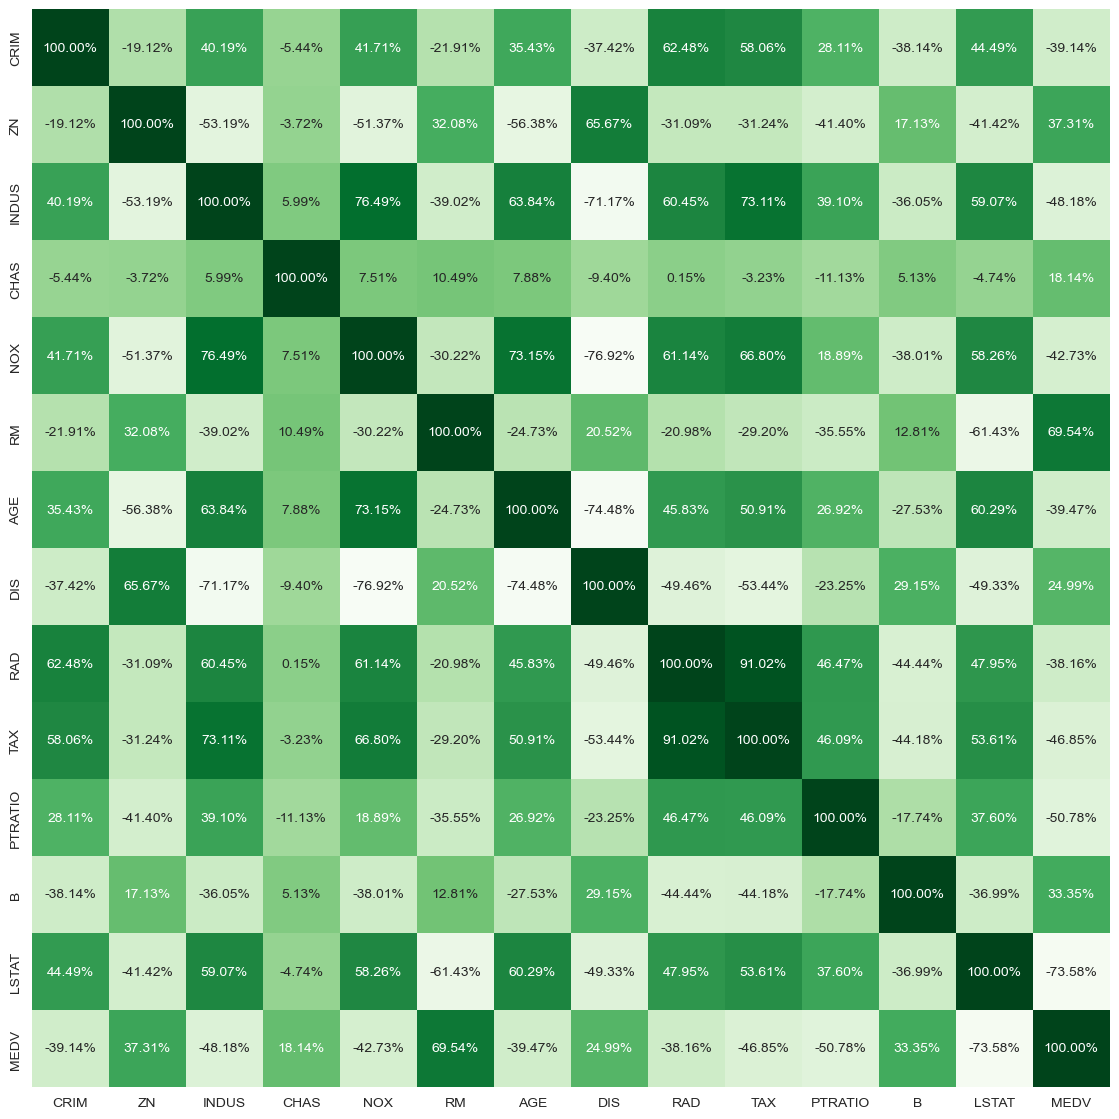

In [32]:
# Plotting the heatmap of correlation between features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 14))
sns.heatmap(corr, cbar=False, square=True, fmt='.2%', annot=True, cmap='Greens')


<Axes: >

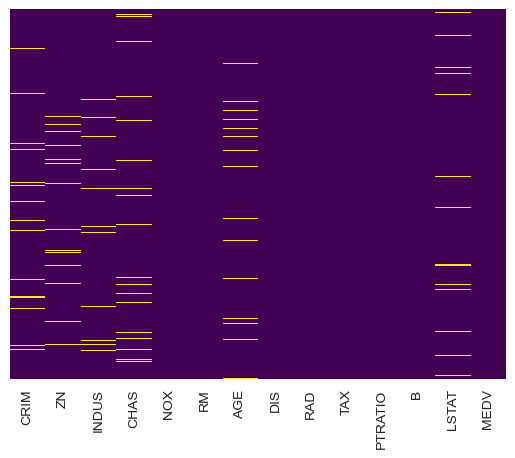

In [33]:
# Checking the null values using heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')


<Axes: xlabel='RAD', ylabel='count'>

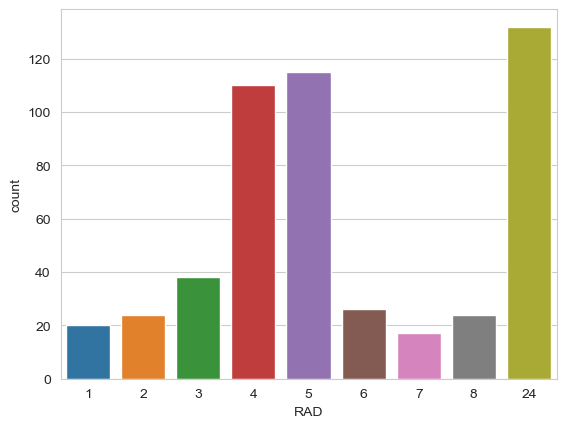

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='RAD', data=df)


<Axes: xlabel='CHAS', ylabel='count'>

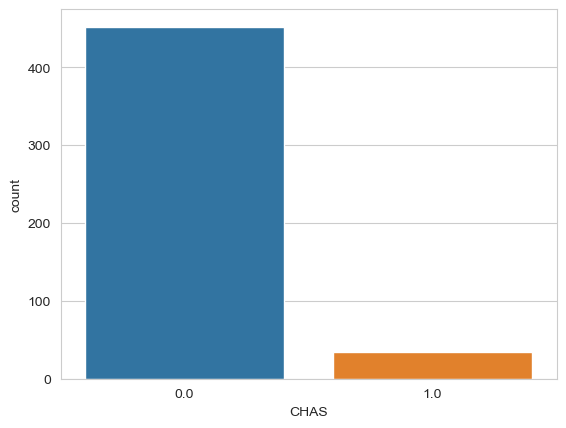

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',data=df)

<Axes: xlabel='CHAS', ylabel='count'>

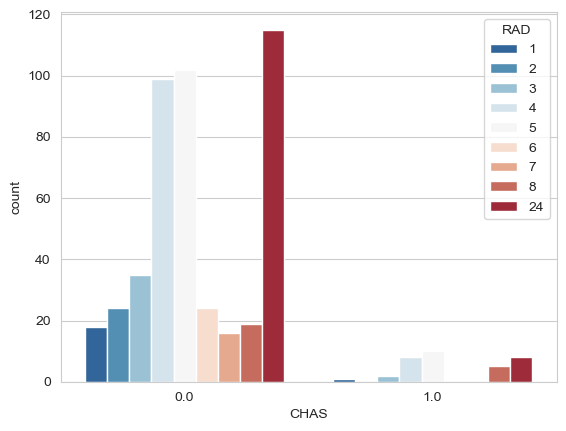

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',hue='RAD',data=df,palette='RdBu_r')

C:\Users\rajan\AppData\Local\Temp\ipykernel_20220\2338581227.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AGE'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='AGE'>

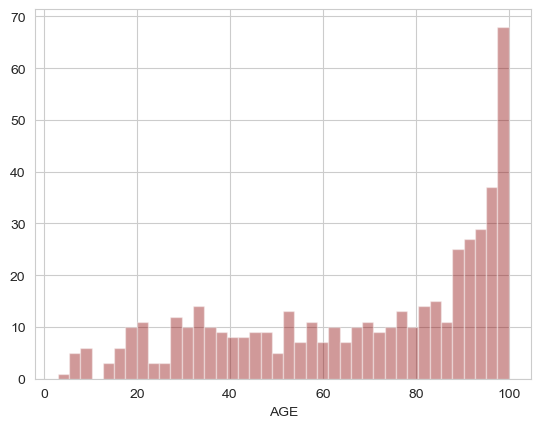

In [37]:
sns.distplot(df['AGE'].dropna(),kde=False,color='darkred',bins=40)

C:\Users\rajan\AppData\Local\Temp\ipykernel_20220\3706705686.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CRIM'].dropna(),kde=False,color='darkorange',bins=40)


<Axes: xlabel='CRIM'>

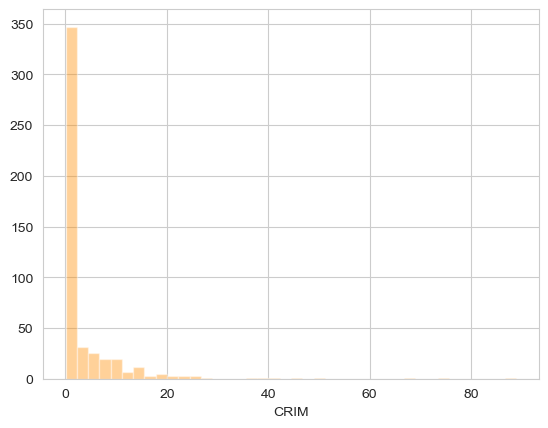

In [38]:
sns.distplot(df['CRIM'].dropna(),kde=False,color='darkorange',bins=40)

C:\Users\rajan\AppData\Local\Temp\ipykernel_20220\221607351.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RM'].dropna(),kde=False,color='darkblue',bins=40)


<Axes: xlabel='RM'>

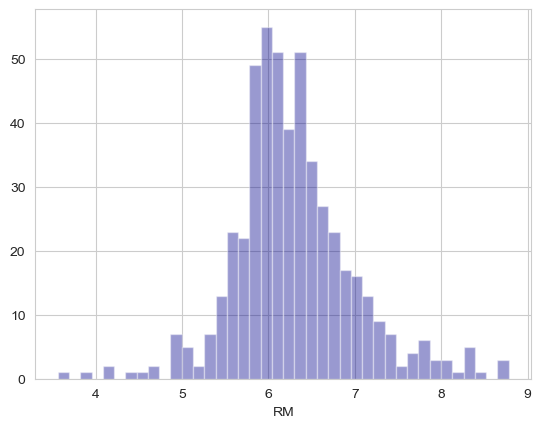

In [39]:
sns.distplot(df['RM'].dropna(),kde=False,color='darkblue',bins=40)

In [40]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:13] #independent columns
y = df.iloc[:,-1] #target column i.e price range